In [12]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import os
import shutil
from itertools import combinations
from scipy.spatial import distance

In [13]:
#path of the new dataset
path='./TCIA_new'

In [14]:
###get patient ID from filename###
patientID=[]
for x in os.listdir(os.path.join(path,'image')):
    if x[:3] in patientID:
        continue
    else:
        patientID.append(x[:3])
print("The number of patients : ", len(patientID))

The number of patients :  100


In [17]:
###get best image per patient###
maxDia={}    #maxDia={mask file name:radius of tumor}
bestSize={}  #bestSize={patientID:radius of the biggest tumor}
bestImg={}   #bestImg={patientID:mask file name}
for i in patientID:
    for x in [file for file in os.listdir(os.path.join(path,'mask')) if file.startswith(i)]:
        fileName,ext=os.path.splitext(x)
        if ext=='.png' or ext=='.jpg':
            img=cv2.imread(os.path.join(path,'mask',x),cv2.COLOR_BGR2GRAY)
        else:
            continue
        #find contours from the image
        cnts,_=cv2.findContours(img, 1, cv2.CHAIN_APPROX_NONE)
        #if there is no tumor, continue
        if len(cnts)==0:
            continue
        '''
        if len(cnts)>1:
            print(x,len(cnts))
        '''
        #get radius of the tumor
        dist=[]
        for j in range(len(cnts)):
            cnts[j].shape=(len(cnts[j]),2)
            comb=list(combinations(map(list,cnts[j]),2))
            for k in range(len(comb)):
                dist.append(distance.euclidean(comb[k][0],comb[k][1]))
            maxDia.update({x:max(dist)}) #update maxDia dictionary
            dist=[]
    #update bestImg and bestSize dictionary
    bestImg.update({i:max(maxDia,key=maxDia.get)})
    bestSize.update({i:max(maxDia.values())})
    print('***********patientID : ',i,'***********')
    print(maxDia)
    maxDia={}

***********patientID :  061 ***********
{'061034.png': 69.85699678629192, '061035.png': 55.326304774492215, '061031.png': 37.69615364994153, '061030.png': 37.94733192202055, '061032.png': 52.839379254491625, '061033.png': 65.80273550544841, '061029.png': 25.612496949731394}
***********patientID :  290 ***********
{'290029.png': 139.8070098385628, '290028.png': 131.04579352272242, '290038.png': 107.91200118615167, '290039.png': 106.3202708800161, '290034.png': 137.82960494755835, '290035.png': 136.01470508735443, '290021.png': 70.45565981523414, '290037.png': 117.65202930676547, '290023.png': 79.02531240052139, '290022.png': 71.47027354082255, '290036.png': 117.5967686630887, '290032.png': 151.82226450688975, '290026.png': 112.17842929904127, '290027.png': 115.10864433221339, '290033.png': 147.6279106402309, '290025.png': 83.3606621854697, '290031.png': 145.11374848717816, '290030.png': 159.66527487215245, '290024.png': 70.8801805866774, '290043.png': 41.7612260356422, '290042.png': 60.

***********patientID :  266 ***********
{'266032.png': 54.230987451824994, '266033.png': 52.92447448959697, '266031.png': 53.600373133029585, '266030.png': 51.478150704935004, '266034.png': 52.839379254491625, '266035.png': 53.48831648126533, '266036.png': 40.44749683231337, '266029.png': 45.31004303683677, '266028.png': 47.01063709417264}
***********patientID :  047 ***********
{'047033.png': 80.2807573457052, '047027.png': 59.941638282582836, '047026.png': 63.245553203367585, '047032.png': 79.02531240052139, '047024.png': 55.57877292636101, '047030.png': 50.24937810560445, '047019.png': 20.248456731316587, '047031.png': 90.4267659490264, '047025.png': 65.80273550544841, '047021.png': 55.569775957799216, '047035.png': 70.45565981523414, '047034.png': 63.50590523722971, '047020.png': 25.80697580112788, '047036.png': 69.87131027825369, '047022.png': 55.44366510251645, '047023.png': 55.94640292279746, '047037.png': 64.93843238021688, '047044.png': 63.788713735268246, '047045.png': 64.140

***********patientID :  024 ***********
{'024033.png': 60.4648658313239, '024027.png': 35.4400902933387, '024026.png': 24.186773244895647, '024032.png': 65.55150646628954, '024030.png': 58.69412236331676, '024031.png': 69.72087205421343, '024035.png': 65.19202405202648, '024034.png': 65.80273550544841, '024036.png': 60.30754513325841, '024037.png': 55.08175741568164, '024038.png': 37.12142238654117, '024028.png': 43.174066289845804, '024029.png': 50.0}
***********patientID :  030 ***********
{'030045.png': 31.38470965295043, '030044.png': 56.88585061331157, '030040.png': 77.47257579298626, '030041.png': 83.81527307120105, '030043.png': 50.53711507397311, '030042.png': 77.47257579298626, '030019.png': 95.2732911156112, '030025.png': 63.34824385884742, '030031.png': 95.524865872714, '030030.png': 98.59513172565875, '030024.png': 66.91038783328041, '030032.png': 108.46197490364999, '030026.png': 95.2102935611481, '030027.png': 113.17685275708986, '030033.png': 116.92732785794773, '030037.

***********patientID :  093 ***********
{'093028.png': 93.86160024205851, '093029.png': 99.08582138732059, '093039.png': 97.04638066409278, '093038.png': 99.68951800465283, '093036.png': 102.88342918079665, '093037.png': 104.92378186092989, '093035.png': 104.75208828467335, '093034.png': 108.46197490364999, '093030.png': 98.73702446397704, '093025.png': 74.04052944165107, '093031.png': 113.14592347937243, '093027.png': 84.11896337925236, '093033.png': 96.25487000666512, '093032.png': 113.37107214805724, '093026.png': 83.38465086573187}
***********patientID :  105 ***********
{'105016.png': 36.89173349139343, '105017.png': 66.18912297349165, '105029.png': 174.4706279005151, '105028.png': 171.91858538273283, '105038.png': 151.34728276384746, '105039.png': 156.6301375853319, '105048.png': 39.81205847478876, '105040.png': 146.01369798755184, '105041.png': 132.09844813622905, '105043.png': 156.92354826475216, '105042.png': 119.81652640600127, '105046.png': 114.47707194019246, '105047.png': 

***********patientID :  252 ***********
{'252036.png': 34.40930106817051, '252035.png': 34.48187929913333, '252034.png': 39.92492955535426, '252030.png': 38.01315561749642, '252031.png': 39.824615503479755, '252033.png': 36.069377593742864, '252032.png': 38.07886552931954, '252029.png': 26.92582403567252}
***********patientID :  167 ***********
{'167033.png': 38.27531841800928, '167032.png': 28.30194339616981, '167031.png': 19.849433241279208}
***********patientID :  296 ***********
{'296035.png': 40.80441152620633, '296034.png': 49.8196748283246, '296030.png': 32.7566787083184, '296031.png': 34.48187929913333, '296033.png': 55.71355310873648, '296032.png': 58.18934610390462}
***********patientID :  121 ***********
{'121028.png': 53.600373133029585, '121029.png': 64.8459713474939, '121039.png': 51.86520991955976, '121038.png': 55.226805085936306, '121040.png': 53.85164807134504, '121036.png': 55.362442142665635, '121037.png': 51.62363799656123, '121035.png': 64.51356446515724, '121034.

***********patientID :  109 ***********
{'109029.png': 99.86490875177326, '109028.png': 95.77055915050303, '109038.png': 115.10430052782563, '109039.png': 109.62207806824317, '109040.png': 41.78516483155236, '109037.png': 130.0, '109036.png': 133.46160496562297, '109034.png': 135.36986370680884, '109035.png': 142.41137595009747, '109031.png': 113.37107214805724, '109025.png': 23.40939982143925, '109030.png': 118.53269591129698, '109026.png': 46.09772228646444, '109032.png': 126.57013865837392, '109033.png': 137.3608386695422, '109027.png': 82.09750300709517}
***********patientID :  014 ***********
{'014030.png': 46.238512086787566, '014031.png': 51.10772935672255, '014033.png': 53.150729063673246, '014027.png': 35.510561809129406, '014032.png': 54.91812087098393, '014036.png': 29.410882339705484, '014037.png': 22.47220505424423, '014035.png': 37.44329045369811, '014034.png': 40.80441152620633, '014028.png': 39.21734310225516, '014029.png': 43.278170016764804}
***********patientID :  05

***********patientID :  022 ***********
{'022045.png': 55.65968020030299, '022044.png': 55.65968020030299, '022040.png': 95.1892851112981, '022041.png': 82.87339742040264, '022043.png': 59.64059020499378, '022042.png': 72.00694410957877, '022019.png': 44.28317965096906, '022031.png': 126.64912159190051, '022025.png': 76.4198926981712, '022024.png': 64.28841264178172, '022030.png': 120.41594578792295, '022026.png': 88.54377448471462, '022032.png': 130.6789960169575, '022033.png': 128.51459061133875, '022027.png': 82.96987405076617, '022023.png': 51.54609587543949, '022037.png': 108.2081327812286, '022036.png': 108.33743581975715, '022022.png': 49.36598018878993, '022034.png': 125.39936203984452, '022020.png': 41.78516483155236, '022021.png': 46.17358552246078, '022035.png': 123.14625451064275, '022038.png': 102.08329931972223, '022039.png': 97.16480844420988, '022029.png': 107.00467279516349, '022028.png': 91.76055797563569}
***********patientID :  064 ***********
{'064029.png': 56.0357

***********patientID :  117 ***********
{'117029.png': 82.54089895318563, '117028.png': 76.21679604916491, '117038.png': 24.08318915758459, '117039.png': 28.792360097775937, '117040.png': 31.38470965295043, '117041.png': 29.832867780352597, '117043.png': 23.259406699226016, '117042.png': 22.20360331117452, '117044.png': 17.69180601295413, '117023.png': 53.45091205957107, '117022.png': 53.225933528685054, '117034.png': 72.11102550927978, '117020.png': 36.87817782917155, '117021.png': 43.08131845707603, '117035.png': 31.953090617340916, '117031.png': 79.12016177940993, '117025.png': 84.64632301523794, '117024.png': 67.72001181334805, '117030.png': 82.92767933567175, '117026.png': 83.43260753446461, '117032.png': 77.15568676384133, '117033.png': 70.178344238091, '117027.png': 80.52328855678958}
***********patientID :  225 ***********
{'225034.png': 109.04127658827184, '225035.png': 118.3427226321923, '225023.png': 43.04648650006177, '225037.png': 107.44766167767449, '225036.png': 123.2396

***********patientID :  025 ***********
{'025038.png': 91.7877987534291, '025039.png': 74.94664769020693, '025029.png': 135.6502856613284, '025028.png': 146.102703602637, '025025.png': 120.33287165193059, '025031.png': 146.102703602637, '025030.png': 145.24806367039804, '025024.png': 112.0044641967453, '025032.png': 146.696966567138, '025026.png': 128.37834708392222, '025027.png': 135.14806694880988, '025033.png': 145.0, '025037.png': 94.81033698917012, '025023.png': 91.40021881811882, '025022.png': 80.89499366462674, '025036.png': 111.08555261599052, '025034.png': 152.80052355931247, '025035.png': 137.7679207943562, '025021.png': 54.3323108288245, '025044.png': 46.87216658103186, '025040.png': 73.60027173862879, '025041.png': 66.88796603276258, '025043.png': 61.91122676865643, '025042.png': 60.440052945046304}
***********patientID :  292 ***********
{'292038.png': 115.96551211459379, '292039.png': 116.61903789690601, '292029.png': 112.00892821556681, '292028.png': 109.7679370308106, '

In [18]:
print(bestImg)

{'061': '061034.png', '290': '290030.png', '068': '068036.png', '284': '284041.png', '206': '206032.png', '208': '208028.png', '034': '034030.png', '099': '099029.png', '190': '190040.png', '115': '115028.png', '008': '008033.png', '197': '197031.png', '266': '266032.png', '047': '047031.png', '053': '053035.png', '006': '006034.png', '012': '012036.png', '233': '233024.png', '268': '268033.png', '123': '123033.png', '078': '078032.png', '202': '202035.png', '250': '250032.png', '257': '257028.png', '024': '024031.png', '030': '030033.png', '130': '130039.png', '176': '176030.png', '224': '224029.png', '005': '005027.png', '276': '276027.png', '230': '230036.png', '239': '239031.png', '018': '018035.png', '093': '093032.png', '105': '105033.png', '143': '143036.png', '265': '265034.png', '237': '237031.png', '011': '011036.png', '193': '193026.png', '116': '116031.png', '150': '150032.png', '050': '050034.png', '200': '200038.png', '073': '073031.png', '252': '252034.png', '167': '1670

In [19]:
print(bestSize)

{'061': 69.85699678629192, '290': 159.66527487215245, '068': 163.52675622050356, '284': 81.98780397107853, '206': 53.150729063673246, '208': 103.24727599312246, '034': 120.7393887677091, '099': 123.0690862889621, '190': 149.21461054467824, '115': 144.1700384962146, '008': 98.22932352408826, '197': 99.12618221237011, '266': 54.230987451824994, '047': 90.4267659490264, '053': 138.2208377922808, '006': 128.08200498118384, '012': 167.29913329123974, '233': 144.10065926289164, '268': 82.37718130647589, '123': 126.92123541787639, '078': 56.302753041036986, '202': 40.26164427839479, '250': 40.36087214122113, '257': 154.30489298787643, '024': 69.72087205421343, '030': 116.92732785794773, '130': 111.89280584559492, '176': 63.0317380372777, '224': 135.20724832641184, '005': 145.2067491544384, '276': 195.020511741714, '230': 111.00450441310929, '239': 155.08062419270823, '018': 135.09256086106296, '093': 113.37107214805724, '105': 181.02486017119307, '143': 146.48549416239138, '265': 78.447434629

In [20]:
#make 'patches' dir
if not(os.path.isdir(os.path.join(path,'patches_euclidean'))):
    os.makedirs(os.path.join(path,'patches_euclidean'))
#copy best patches to 'patches' dir
for i in patientID:
    shutil.copy(os.path.join(path,'image',bestImg[i]),os.path.join(path,'patches_euclidean'))
print("The number of patches : ",len(os.listdir(os.path.join(path,'patches_euclidean'))))

The number of patches :  100


patientID: 099


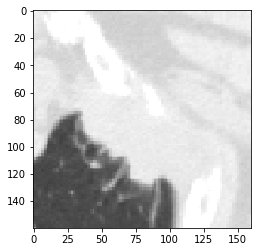

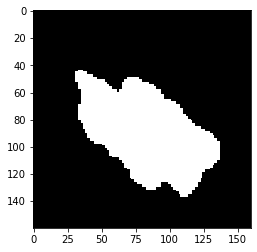

patientID: 173


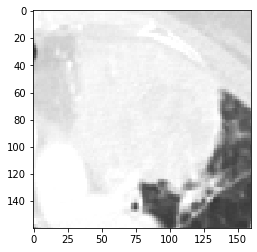

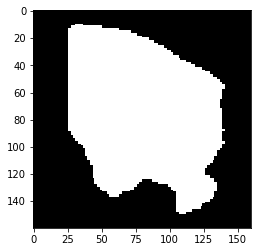

patientID: 061


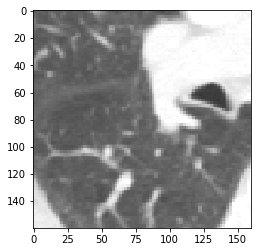

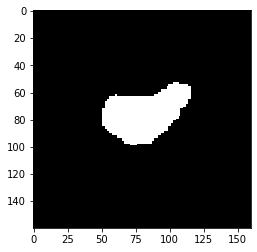

patientID: 285


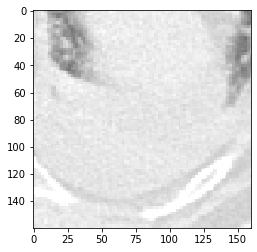

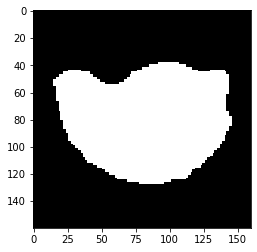

patientID: 155


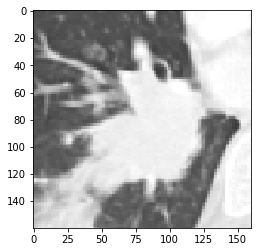

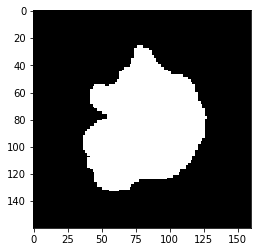

patientID: 225


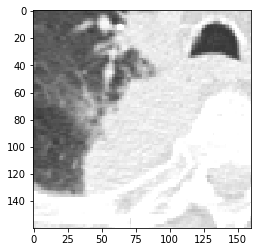

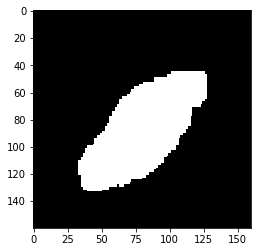

patientID: 024


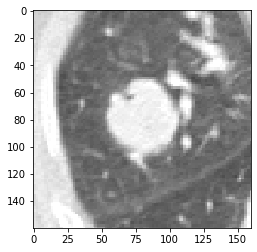

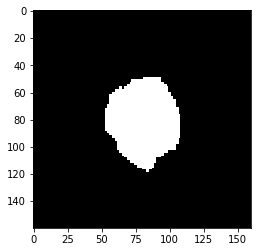

patientID: 047


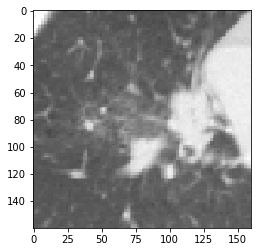

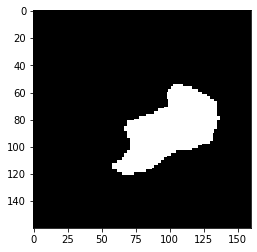

patientID: 073


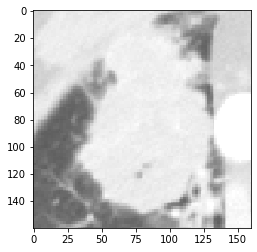

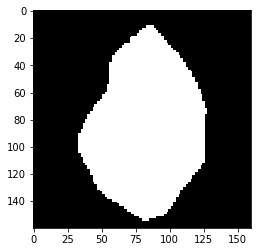

patientID: 063


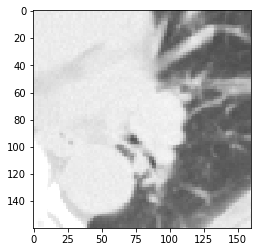

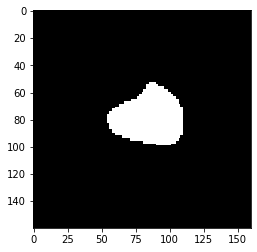

patientID: 092


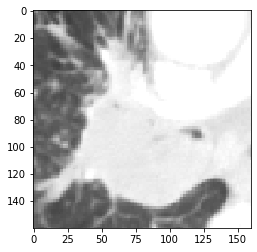

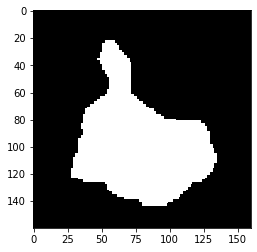

patientID: 045


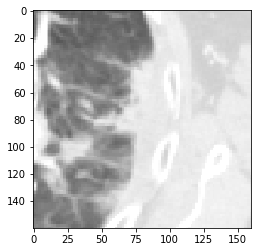

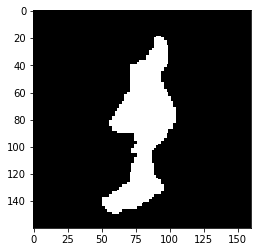

patientID: 145


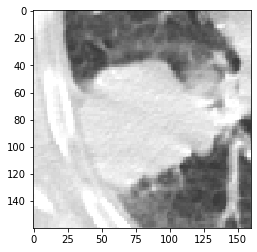

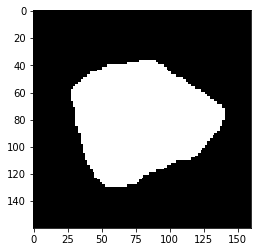

patientID: 258


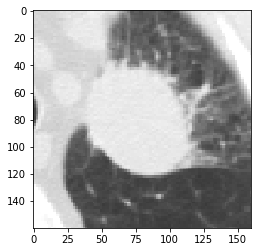

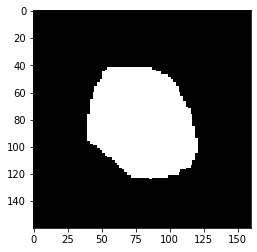

patientID: 115


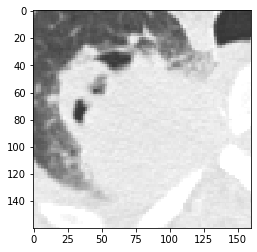

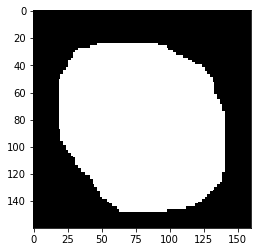

patientID: 237


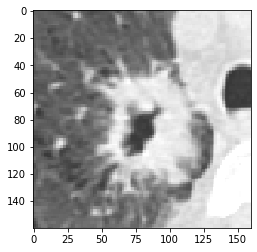

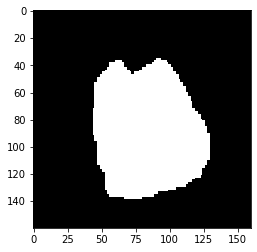

patientID: 279


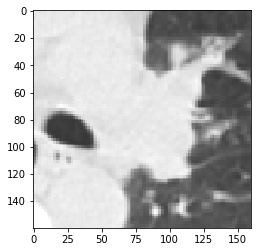

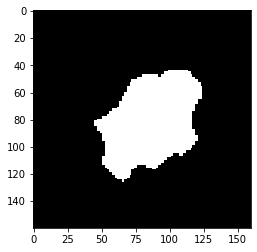

patientID: 239


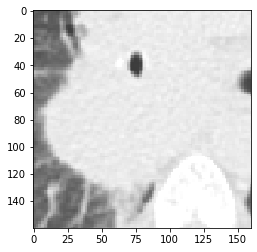

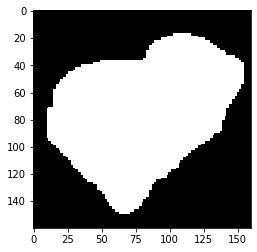

patientID: 012


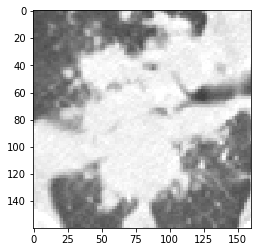

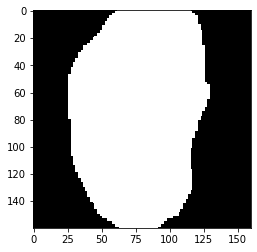

patientID: 266


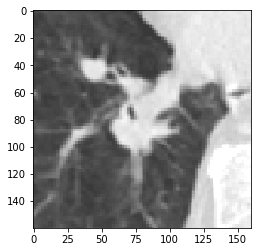

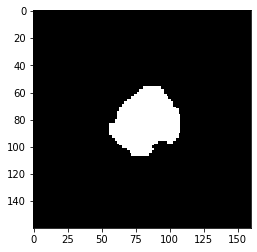

patientID: 026


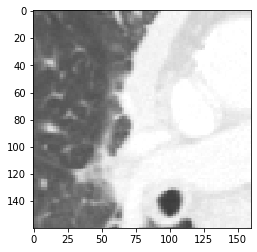

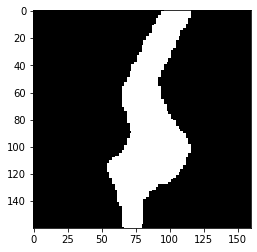

patientID: 096


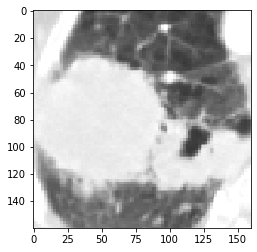

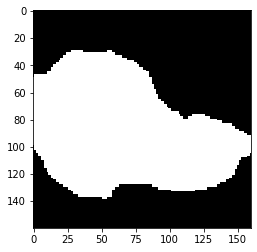

patientID: 041


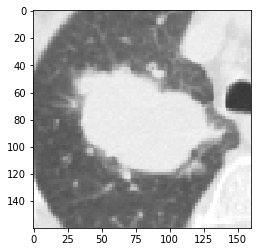

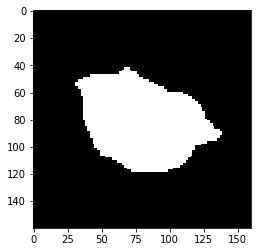

patientID: 143


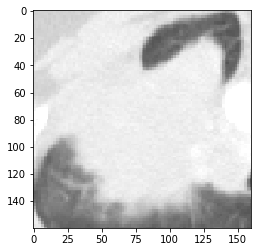

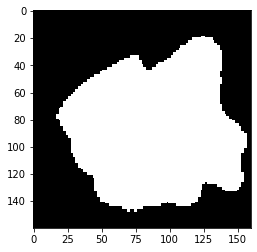

patientID: 250


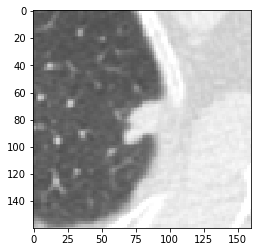

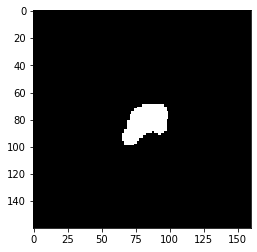

patientID: 233


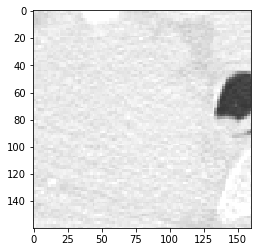

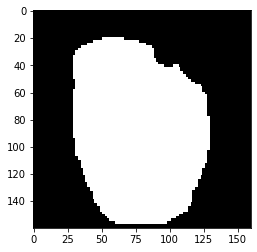

patientID: 022


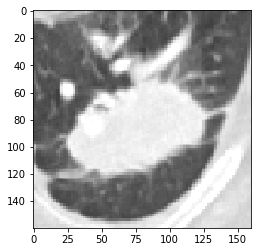

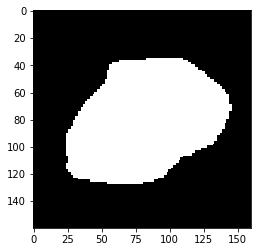

patientID: 122


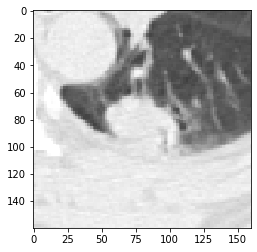

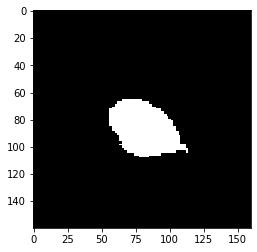

patientID: 114


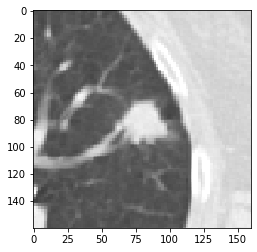

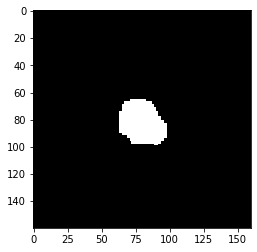

patientID: 014


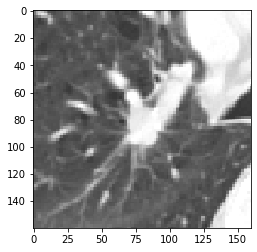

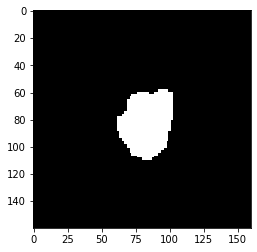

patientID: 252


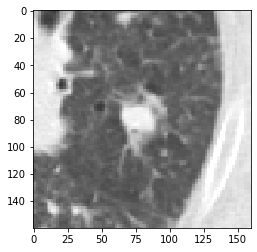

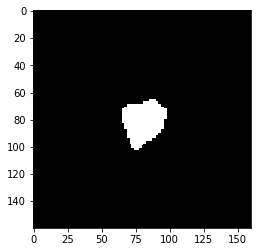

patientID: 224


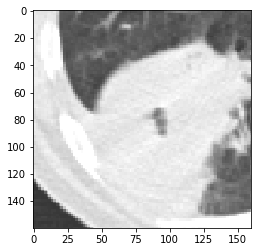

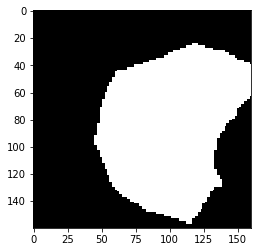

patientID: 030


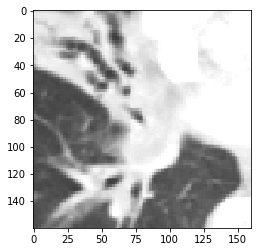

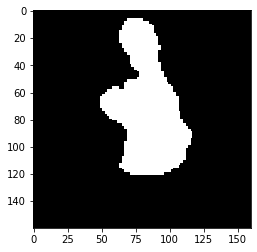

patientID: 190


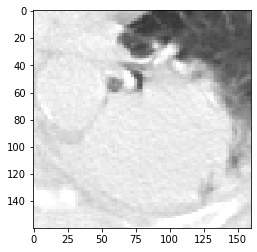

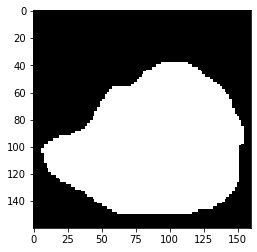

patientID: 008


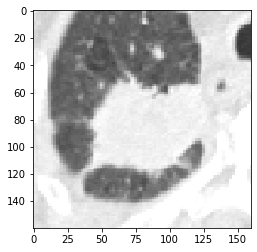

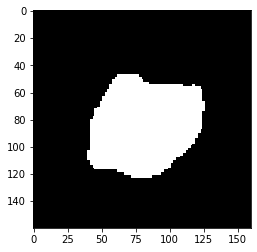

patientID: 257


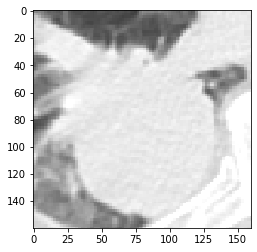

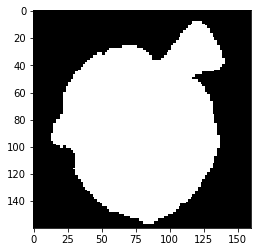

patientID: 200


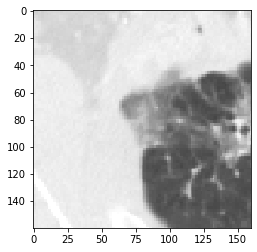

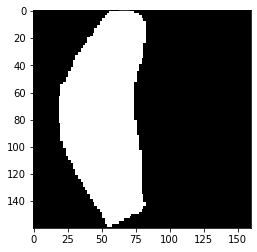

patientID: 167


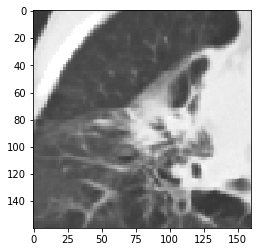

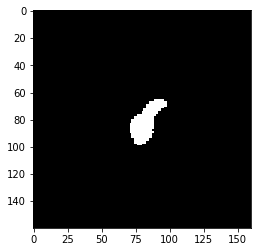

patientID: 264


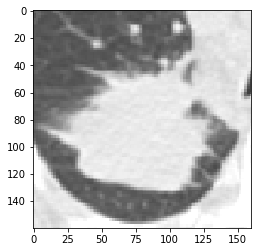

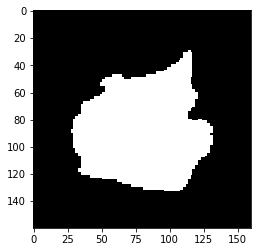

patientID: 151


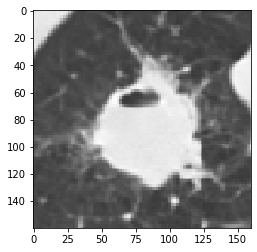

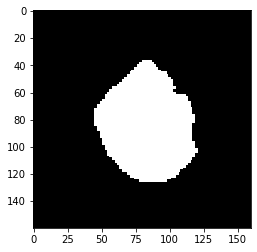

patientID: 018


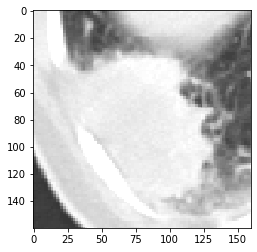

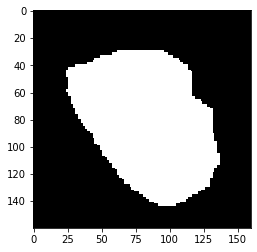

patientID: 098


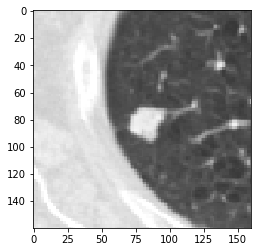

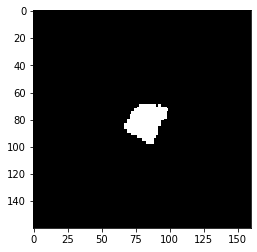

patientID: 177


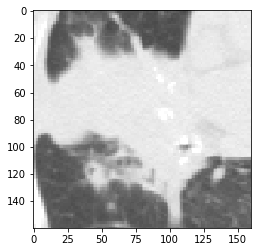

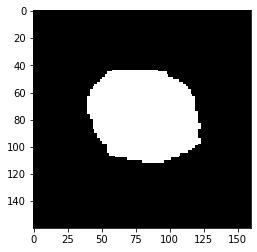

patientID: 046


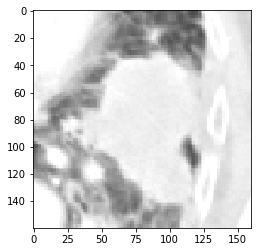

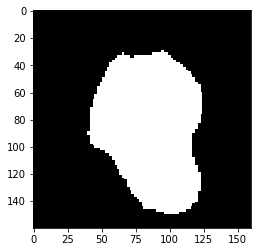

patientID: 032


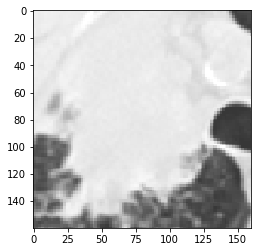

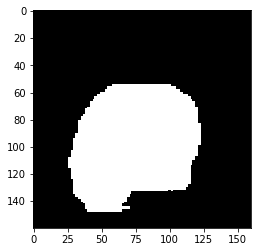

patientID: 276


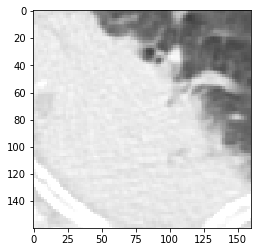

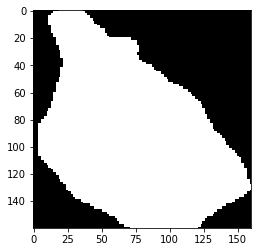

patientID: 116


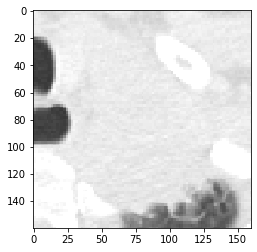

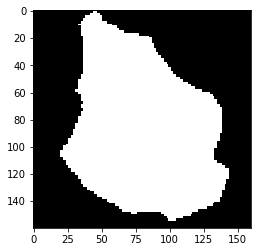

patientID: 053


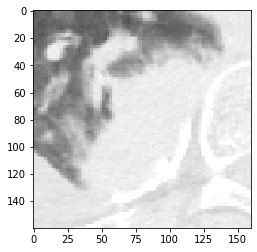

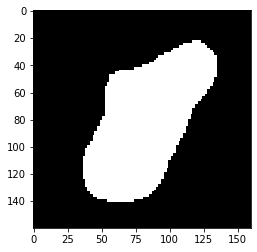

patientID: 268


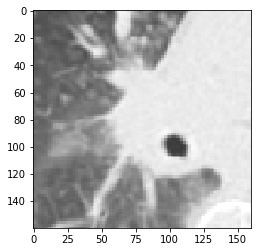

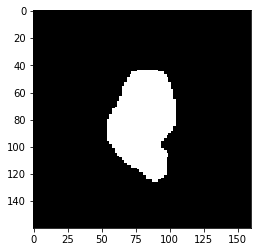

patientID: 006


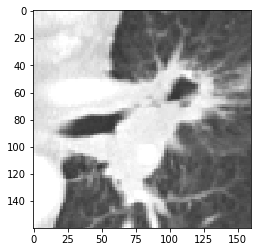

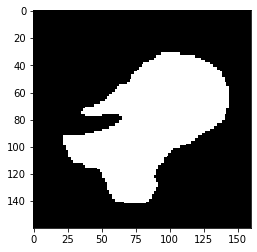

patientID: 284


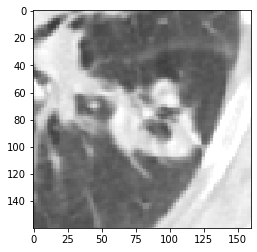

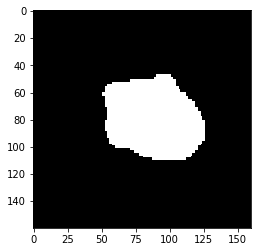

patientID: 035


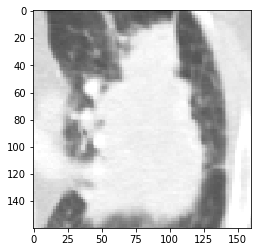

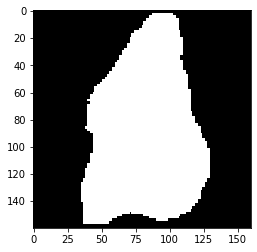

patientID: 292


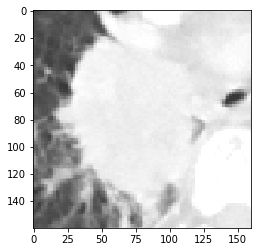

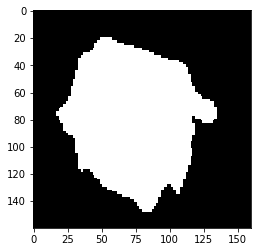

patientID: 104


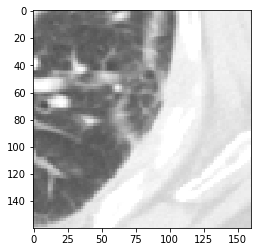

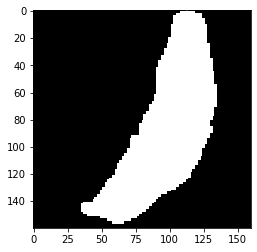

patientID: 004


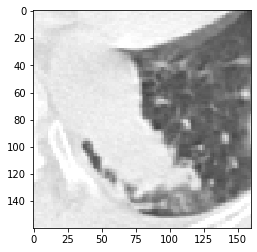

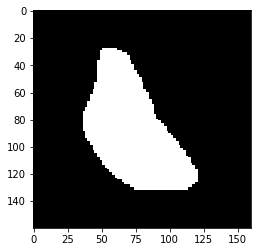

patientID: 210


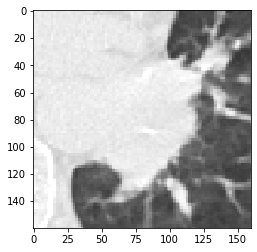

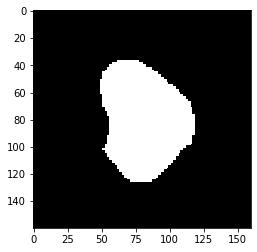

patientID: 130


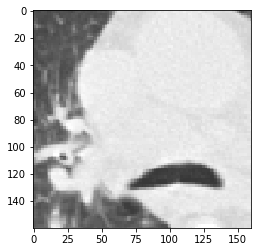

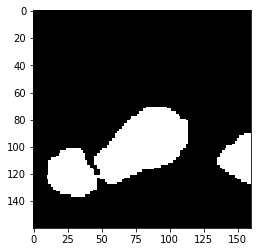

patientID: 193


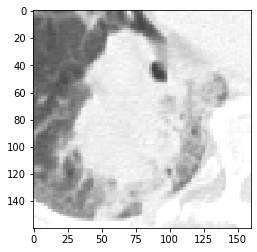

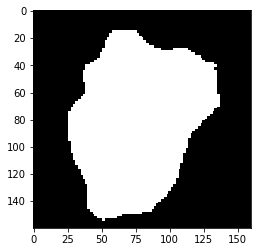

patientID: 011


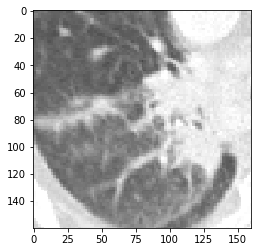

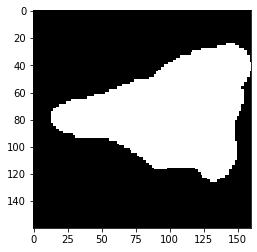

patientID: 054


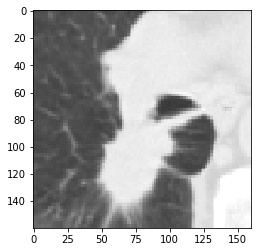

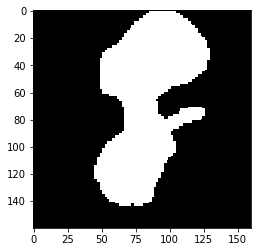

patientID: 101


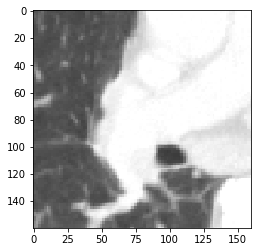

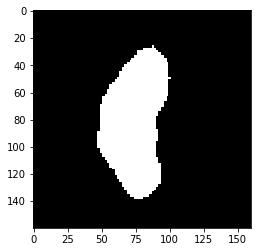

patientID: 095


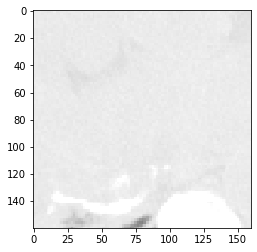

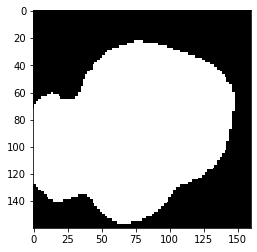

patientID: 242


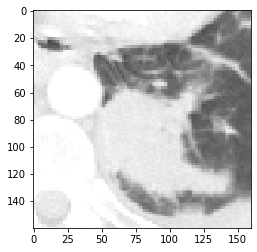

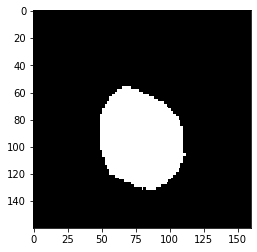

patientID: 093


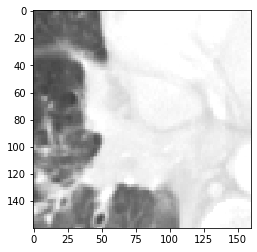

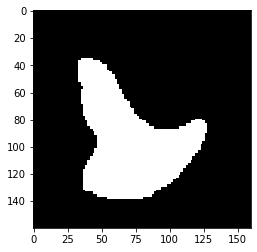

patientID: 202


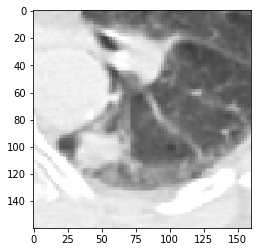

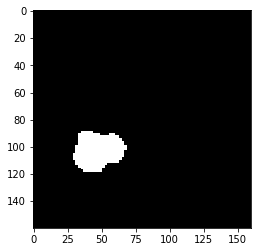

patientID: 146


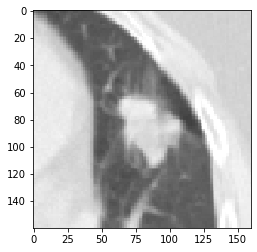

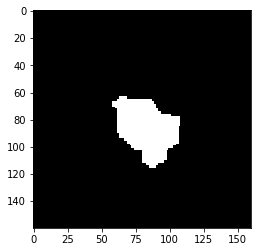

patientID: 025


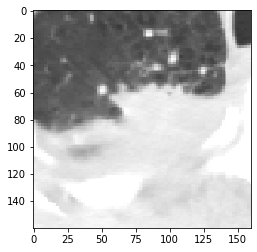

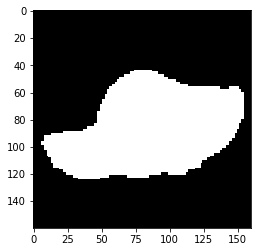

patientID: 263


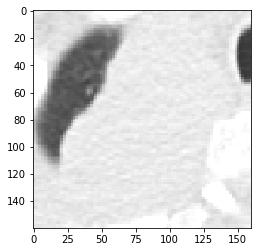

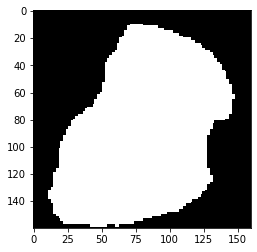

patientID: 181


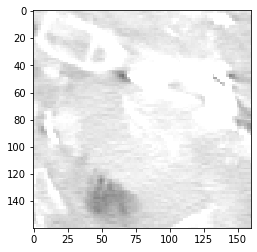

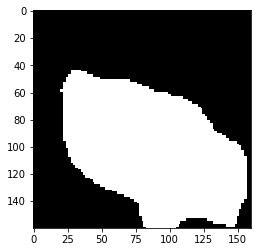

patientID: 135


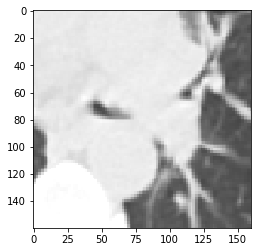

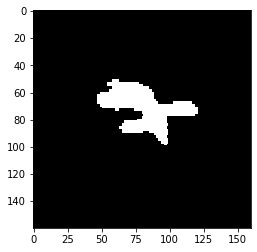

patientID: 037


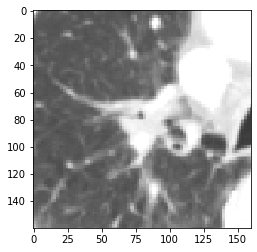

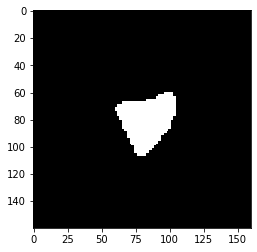

patientID: 290


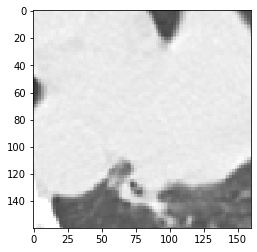

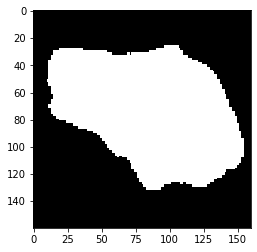

patientID: 197


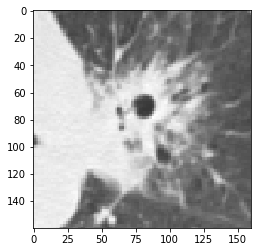

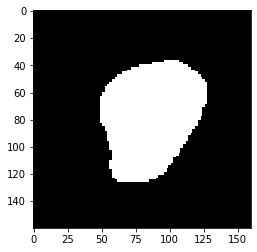

patientID: 123


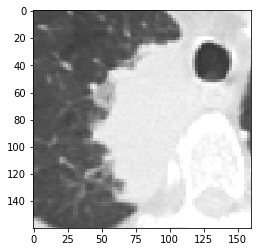

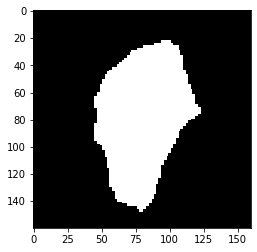

patientID: 064


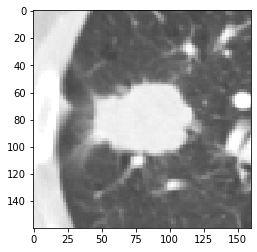

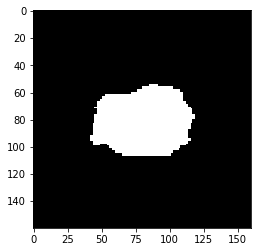

patientID: 009


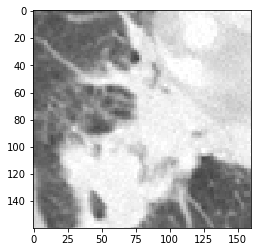

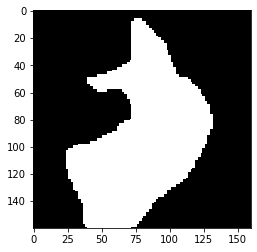

patientID: 107


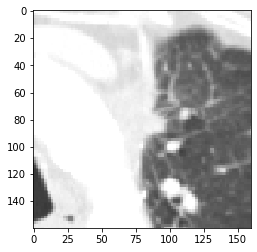

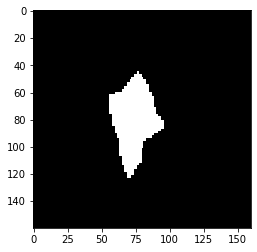

patientID: 265


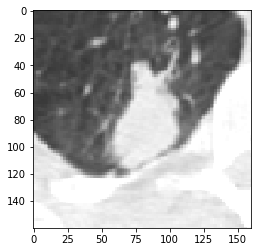

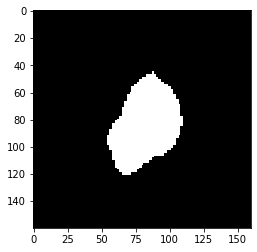

patientID: 007


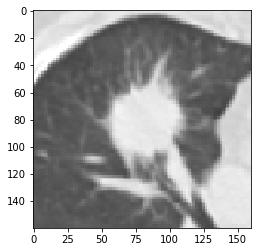

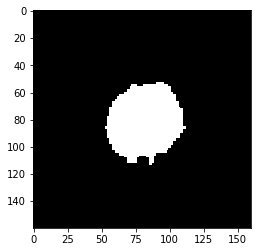

patientID: 042


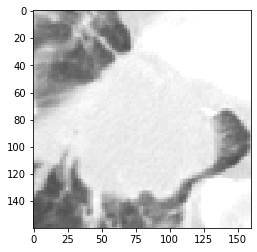

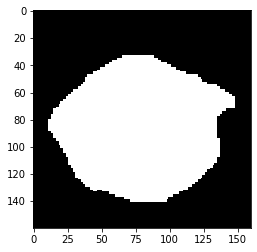

patientID: 222


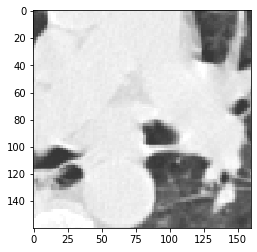

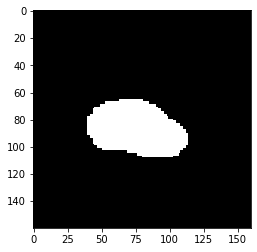

patientID: 131


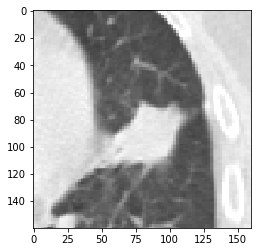

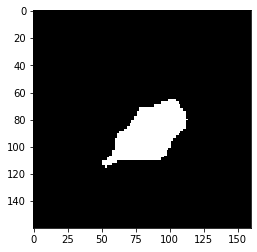

patientID: 109


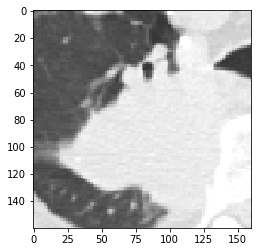

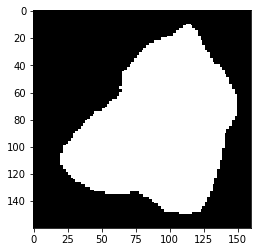

patientID: 050


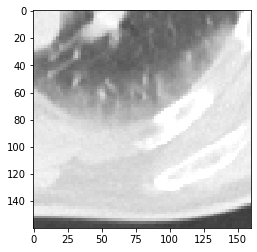

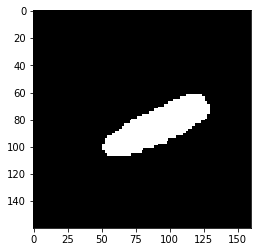

patientID: 230


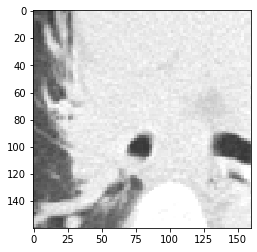

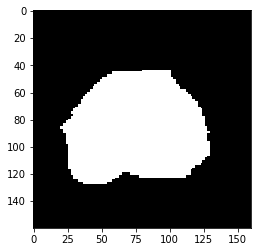

patientID: 176


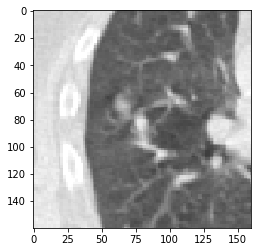

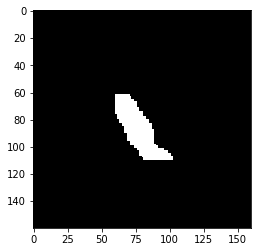

patientID: 208


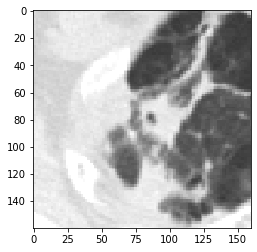

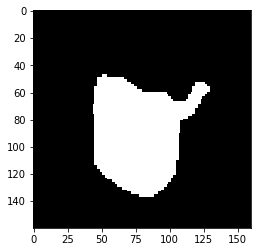

patientID: 034


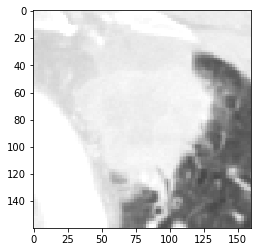

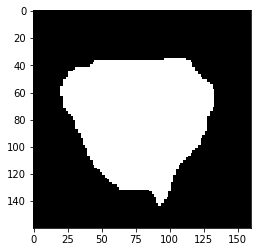

patientID: 052


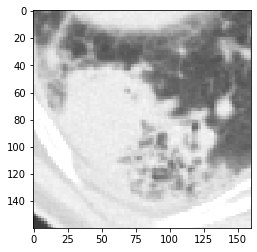

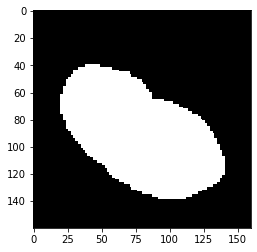

patientID: 163


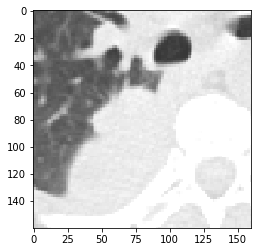

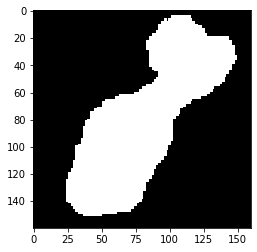

patientID: 117


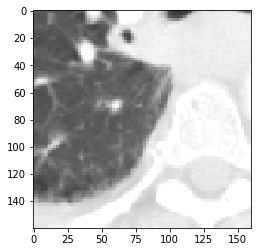

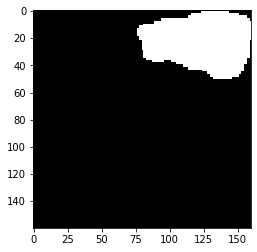

patientID: 206


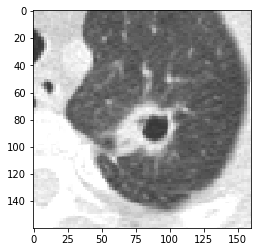

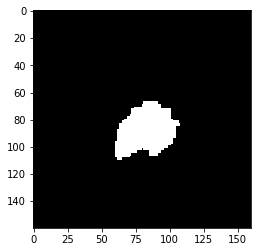

patientID: 078


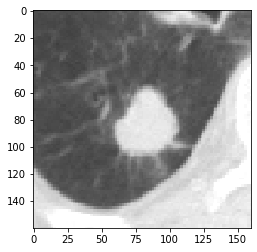

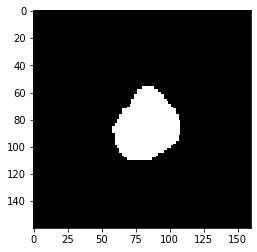

patientID: 121


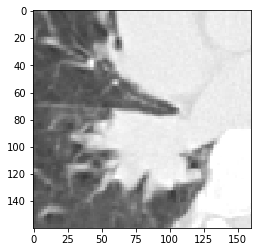

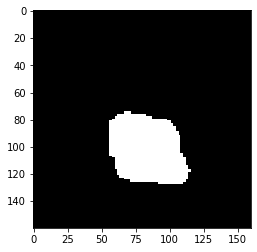

patientID: 288


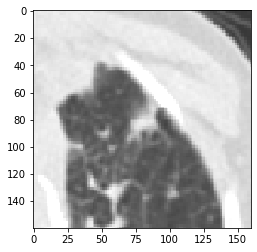

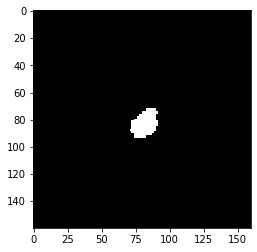

patientID: 296


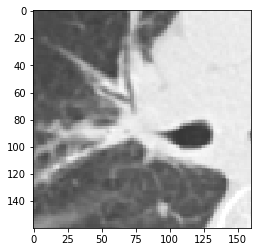

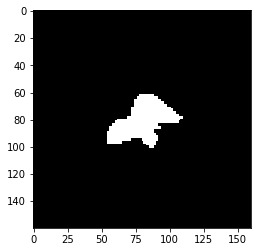

patientID: 105


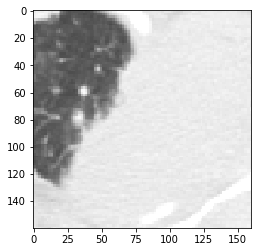

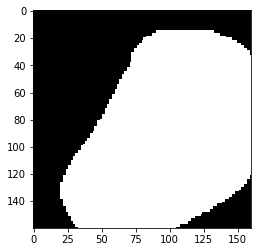

patientID: 005


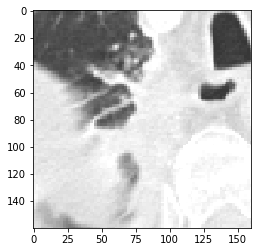

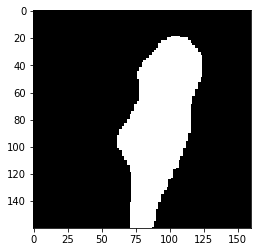

patientID: 150


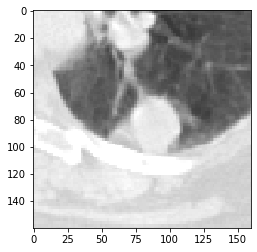

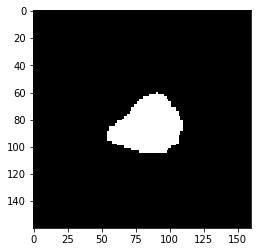

patientID: 068


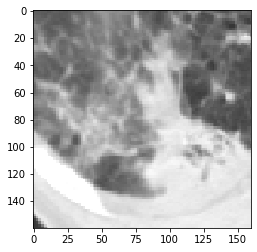

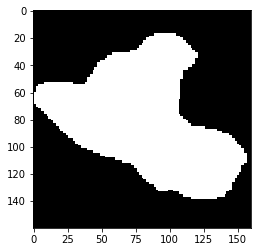

In [10]:

for x in os.listdir(os.path.join(path,'patches')):
    print("patientID:" ,x[:3])
    plt.imshow(cv2.imread(os.path.join(path,'patches',x)))
    plt.show()
    plt.imshow(cv2.imread(os.path.join(path,'mask',x)))
    plt.show()
